## Search Tree -> Similar Words

In [6]:
csv_path = '/home/qinhao/nlp/assignments/resource/sqlResult_1558435.csv'

In [2]:
import pandas as pd

In [7]:
content = pd.read_csv(csv_path, encoding='gb18030')

In [8]:
content = content.fillna('')

In [9]:
news_content = content['content'].tolist()

In [10]:
import jieba

In [11]:
def cut(string): return ' '.join(jieba.cut(string))

In [12]:
cut('这是一个测试')

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.714 seconds.
Prefix dict has been built succesfully.


'这是 一个 测试'

In [13]:
import re

In [14]:
def token(string):
    return re.findall(r'[\d|\w]+', string)

In [15]:
token('这是一个测试\n\n\n')

['这是一个测试']

In [16]:
news_content = [token(n) for n in news_content]

In [17]:
news_content = [' '.join(n) for n in news_content]

In [18]:
news_content = [cut(n) for n in news_content]

In [19]:
news_content[1]

'骁龙 835 作为 唯一 通过 Windows   10 桌面 平台 认证 的 ARM 处理器   高通 强调   不会 因为 只 考虑 性能 而 去 屏蔽掉 小 核心   相反   他们 正 联手 微软   找到 一种 适合 桌面 平台 的   兼顾 性能 和 功耗 的 完美 方案   报道 称   微软 已经 拿到 了 一些 新 的 源码   以便 Windows   10 更好 地 理解 big   little 架构   资料 显示   骁龙 835 作为 一款 集成 了 CPU   GPU   基带   蓝牙   Wi   Fi 的 SoC   比 传统 的 Wintel 方案 可以 节省 至少 30   的 PCB 空间   按计划   今年 Q4   华硕   惠普   联想 将 首发 骁龙 835   Win10 电脑   预计 均 是 二合一 形态 的 产品   当然   高通 骁龙 只是 个 开始   未来 也许 还 能 见到 三星 Exynos   联发科   华为 麒麟   小米 澎湃 等 进入 Windows   10 桌面 平台'

In [24]:
with open('news-sentences-cut.txt', 'w') as f:
    for n in news_content:
        f.write(n + '\n')

In [1]:
from gensim.models import Word2Vec

In [2]:
from gensim.models.word2vec import LineSentence

In [3]:
model = Word2Vec.load('all.model')

In [4]:
model.train(LineSentence('news-sentences-cut.txt'),total_examples=model.corpus_count,epochs=5)

(64744578, 89170650)

In [5]:
model.save('word2vec.model')

In [6]:
news_word2ve = model

In [7]:
news_word2ve.most_similar('葡萄牙', topn=20)

/home/qinhao/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('西班牙', 0.6601676940917969),
 ('卡斯蒂利亚', 0.5884068012237549),
 ('里斯本', 0.5832850933074951),
 ('阿尔加维', 0.5826187133789062),
 ('马德拉', 0.5805948972702026),
 ('加的斯', 0.5755138993263245),
 ('安哥拉', 0.5656949877738953),
 ('西班牙人', 0.5620958805084229),
 ('圣多明各', 0.5604243278503418),
 ('若昂', 0.5586563348770142),
 ('葡国', 0.5573679208755493),
 ('乌拉圭', 0.5529671907424927),
 ('阿拉贡', 0.5479613542556763),
 ('葡萄牙人', 0.545438826084137),
 ('巴拉圭', 0.540130615234375),
 ('瓦伦西亚', 0.5345463752746582),
 ('巴伦西亚', 0.5337963700294495),
 ('秘鲁', 0.5320936441421509),
 ('加利西亚', 0.5301560163497925),
 ('古巴', 0.5267143249511719)]

## More Date, Better Results

1. 分词的问题
2. **数据量**，数据越多，效果越好，维基百科加进来，那么同义词就要好很多。

In [8]:
news_word2ve.most_similar('捷克', topn=20)

/home/qinhao/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('斯洛伐克', 0.6643435955047607),
 ('捷克斯洛伐克', 0.6269080638885498),
 ('布拉格', 0.6078536510467529),
 ('拉脱维亚', 0.600123405456543),
 ('匈牙利', 0.5999475717544556),
 ('捷克共和国', 0.5969516038894653),
 ('立陶宛', 0.5958138704299927),
 ('波兰', 0.5837600827217102),
 ('布尔诺', 0.5826241970062256),
 ('罗马尼亚', 0.5820562839508057),
 ('斯洛文尼亚', 0.5788295865058899),
 ('塞尔维亚', 0.5760383605957031),
 ('白俄罗斯', 0.5661802291870117),
 ('科希策', 0.5528982877731323),
 ('布拉迪斯拉发', 0.5516632795333862),
 ('阿尔巴尼亚', 0.5484570860862732),
 ('保加利亚', 0.5443689823150635),
 ('亚美尼亚', 0.5427255630493164),
 ('奥地利', 0.5415153503417969),
 ('克罗地亚', 0.5404248237609863)]

In [10]:
news_word2ve.most_similar('认为', topn=30)

/home/qinhao/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('指出', 0.7910226583480835),
 ('表示', 0.7123708724975586),
 ('看来', 0.7014905214309692),
 ('普遍认为', 0.6299036741256714),
 ('强调', 0.5503908395767212),
 ('告诉', 0.5419428944587708),
 ('所说', 0.5280560255050659),
 ('并不认为', 0.5185695886611938),
 ('推测', 0.5044879913330078),
 ('形容', 0.5034866333007812),
 ('担心', 0.49950143694877625),
 ('归咎', 0.49055129289627075),
 ('断言', 0.4886857271194458),
 ('归因于', 0.4793381690979004),
 ('介绍', 0.4791499972343445),
 ('始终认为', 0.47553354501724243),
 ('归咎于', 0.47488903999328613),
 ('坦言', 0.47287341952323914),
 ('建议', 0.4678501486778259),
 ('相信', 0.461765319108963),
 ('解释', 0.4577152729034424),
 ('显然', 0.4542403221130371),
 ('视为', 0.4524523615837097),
 ('批评', 0.4496040642261505),
 ('断定', 0.4475628137588501),
 ('反驳', 0.44696104526519775),
 ('声称', 0.4468964636325836),
 ('确信', 0.4461139142513275),
 ('直言', 0.44418421387672424),
 ('看作', 0.44290024042129517)]

In [11]:
news_word2ve.most_similar('建议', topn=10)

/home/qinhao/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('提议', 0.5560444593429565),
 ('建言', 0.5167909860610962),
 ('忠告', 0.5156879425048828),
 ('劝告', 0.5064224004745483),
 ('申诉', 0.5054352879524231),
 ('要求', 0.4959472417831421),
 ('呼吁', 0.4874993562698364),
 ('提醒', 0.47257620096206665),
 ('认为', 0.4678501486778259),
 ('斟酌', 0.4628090262413025)]

In [12]:
from collections import defaultdict

In [18]:
def get_related_words(initial_words, model):
    """
    @initial_words are initial words we already know
    @model is the word2vec model
    """
    
    unseen = initial_words
    
    seen = defaultdict(int)
    
    max_size = 500  # could be greater
    
    while unseen and len(seen) < max_size:
        if len(seen) % 50 == 0: 
            print('seen length : {}'.format(len(seen)))
            
        node = unseen.pop(0)
        
        new_expanding = [w for w, s in model.most_similar(node, topn=20)]
        
        unseen += new_expanding
        
        seen[node] += 1
        
        # optimal: 1. score function could be revised
        # optimal: 2. using dymanic programming to reduce computing time
    
    return seen

In [14]:
len(news_word2ve.wv.vocab)

535628

In [16]:
related_words = get_related_words(['认为', '表示'], news_word2ve)

seen length : 0


/home/qinhao/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


seen length : 50
seen length : 50
seen length : 100
seen length : 150
seen length : 200
seen length : 250
seen length : 300
seen length : 300
seen length : 300
seen length : 300
seen length : 300
seen length : 300
seen length : 300
seen length : 300
seen length : 300
seen length : 300
seen length : 300
seen length : 350
seen length : 400
seen length : 400
seen length : 400
seen length : 400
seen length : 450


In [37]:
sorted(related_words.items(), key=lambda x: x[1], reverse=True)

[('表示', 93),
 ('指出', 90),
 ('说', 89),
 ('认为', 76),
 ('透露', 68),
 ('所说', 67),
 ('坦言', 63),
 ('提到', 56),
 ('称', 45),
 ('文说', 44),
 ('中说', 42),
 ('告诉', 39),
 ('介绍', 37),
 ('强调', 37),
 ('看来', 36),
 ('明说', 35),
 ('普遍认为', 35),
 ('建议', 34),
 ('呼吁', 28),
 ('称赞', 26),
 ('问', 25),
 ('中称', 23),
 ('接受', 21),
 ('直言', 21),
 ('时说', 20),
 ('说明', 20),
 ('提及', 20),
 ('说道', 19),
 ('写道', 19),
 ('表明', 18),
 ('相信', 18),
 ('确信', 17),
 ('看好', 16),
 ('对此', 15),
 ('特别强调', 15),
 ('知道', 14),
 ('回答', 14),
 ('解释', 13),
 ('尚', 12),
 ('地说', 12),
 ('但是', 12),
 ('还称', 12),
 ('声称', 12),
 ('知情', 12),
 ('质疑', 12),
 ('描述', 12),
 ('引用', 12),
 ('列举', 12),
 ('事实上', 11),
 ('时称', 11),
 ('嚷嚷', 10),
 ('觉得', 10),
 ('咨询', 10),
 ('形容', 10),
 ('阐述', 10),
 ('批评', 10),
 ('张晓明', 9),
 ('北京大学医学部', 9),
 ('志峰', 9),
 ('武说', 9),
 ('海涛', 9),
 ('计生办', 9),
 ('所指', 9),
 ('清楚', 9),
 ('为什么', 9),
 ('证实', 9),
 ('具名', 9),
 ('重申', 9),
 ('应', 9),
 ('而言', 8),
 ('眼中', 8),
 ('因斯', 8),
 ('如是说', 8),
 ('上称', 8),
 ('现阶段', 8),
 ('一说', 7),
 ('看法', 7),
 ('谈起', 7)

## TFIDF Key words

In [21]:
with open('resource/news-sentences-cut.txt','r',encoding='utf-8') as f:
    news_content = f.readlines()

In [22]:
news_content[1]

'骁龙 835 作为 唯一 通过 Windows   10 桌面 平台 认证 的 ARM 处理器   高通 强调   不会 因为 只 考虑 性能 而 去 屏蔽掉 小 核心   相反   他们 正 联手 微软   找到 一种 适合 桌面 平台 的   兼顾 性能 和 功耗 的 完美 方案   报道 称   微软 已经 拿到 了 一些 新 的 源码   以便 Windows   10 更好 地 理解 big   little 架构   资料 显示   骁龙 835 作为 一款 集成 了 CPU   GPU   基带   蓝牙   Wi   Fi 的 SoC   比 传统 的 Wintel 方案 可以 节省 至少 30   的 PCB 空间   按计划   今年 Q4   华硕   惠普   联想 将 首发 骁龙 835   Win10 电脑   预计 均 是 二合一 形态 的 产品   当然   高通 骁龙 只是 个 开始   未来 也许 还 能 见到 三星 Exynos   联发科   华为 麒麟   小米 澎湃 等 进入 Windows   10 桌面 平台\n'

In [23]:
def document_frequency(word): 
    return sum(1 for n in news_content if word in n)

In [24]:
document_frequency('的')

70342

In [25]:
import math

In [26]:
def idf(word):
    """Gets the inversed document frequency"""
    return math.log10(len(news_content) / document_frequency(word))

In [27]:
idf('的') < idf('小米')

True

In [28]:
def tf(word, document):
    """
    Gets the term frequemcy of a @word in a @document.
    """
    words = document.split()
    
    return sum(1 for w in words if w == word)

In [29]:
tf('银行', news_content[11])

6

In [30]:
idf('银行')

1.4550169427748936

In [31]:
idf('短期')

1.9923664854640575

In [32]:
tf('短期', news_content[11])

3

In [33]:
def get_keywords_of_a_ducment(document):
    words = set(document.split())
    
    tfidf = [
        (w, tf(w, document) * idf(w)) for w in words
    ]
    
    tfidf = sorted(tfidf, key=lambda x: x[1], reverse=True)
    
    return tfidf

In [34]:
news_content[101]

'中国 经济网 6 月 23 日讯   记者 刘瑾   日前   中国 机械 工业 百强 企业   汽车 三十 强 企业名单 出炉   在 由 中国 机械 工业 联合会   中国汽车工业协会 主办 的   中国 机械 工业 百强 企业   汽车 工业 三十 强 企业 信息 发布会   上   中国 机械 工业 联合会 会长 王瑞祥 指出   入围 企业 总体 呈现 了 持续增长 态势   2016 年 总 规模   平均 规模 均 创新 高   我国 机械 工业 总体 上 呈现 稳中 向 好 的 发展 态势   主要 经济指标 出现 恢复性 增长   同时   王瑞祥 也 表示   机械 工业 长期 积累 的 结构性 矛盾 还 没有 根本性 改变   新 的 发展 业态   发展 模式 远 未 形成   保持 平稳 健康 发展 的 基础 还 不 牢固   产业 升级   新旧 动能 转换   实现 由大 变强 任重道远   相关 数据 显示   2016 年 机械 百强 入围 企业 规模 是 15   4 亿元   比 上年 略 高   总 规模 达到 16992 亿元   平均 规模 169   92 亿元   两项 均 创新 高   相比 前 两年 的 前十强 排名   名单 基本 没有 什么 变化   只是 工程 机械行业 的 徐工   三一 和 中联重科 由于 之前 市场 环境 等 原因   整体 排位 后移 了 一 两位   但 仍 全部 在 十强 之 列   但 考虑 到 工程 机械行业 最近 以来 的 强烈 增长 态势   明年 该 行业 整体 恢复性 可能 较大   中机联 执行 副会长 陈斌 表示   机械 百强 的 年 换位 率 2005 年 曾 高达 32   此后 逐年 下降   2012 年降 至 6   不过 近几年 又 在 上升   2016 年 升至 22   说明 市场 动荡   不 确定 因素 增加   根据 中机联 公布 的 数据   2017 年 1 至 5 月 机械 增加值 增速 好于 去年 但 呈现 逐月 回落 的 态势   比如 1 至 5 月 增速 为 10   7   比 1 至 4 月 回落 0   2 点   此外 利润总额 也 出现 了 同样 的 走势   专家 分析   这是 由于 钢铁 等 原材料 价格 近

In [35]:
machine_new_keywords=get_keywords_of_a_ducment(news_content[101])

In [36]:
machine_new_keywords

[('机械', 19.73268423154147),
 ('工业', 13.726799287798574),
 ('百强', 12.218936930008129),
 ('机械行业', 11.732905915902746),
 ('王瑞祥', 9.904722647584947),
 ('中机联', 9.904722647584947),
 ('增速', 8.057368905265053),
 ('态势', 7.971371787277901),
 ('恢复性', 6.867694767829172),
 ('规模', 6.861746056315247),
 ('回落', 6.643121992377128),
 ('增长', 6.604587773896507),
 ('企业', 6.260042817487905),
 ('陈斌', 5.9311791790524575),
 ('呈现', 5.279381611367784),
 ('原材料', 5.215938100214726),
 ('16992', 4.9523613237924735),
 ('但远', 4.9523613237924735),
 ('刘瑾', 4.651331328128492),
 ('三十', 4.6438668975349),
 ('入围', 4.629743188559925),
 ('钢铁', 4.588699854270723),
 ('回升', 4.553165964236777),
 ('联合会', 4.4415451172114695),
 ('行业', 4.256149034981132),
 ('后移', 4.253391319456455),
 ('前十强', 4.253391319456455),
 ('发展', 4.24347205022841),
 ('亿元', 4.194707226838383),
 ('更新改造', 4.17421007340883),
 ('机械类', 4.17421007340883),
 ('相当规模', 4.17421007340883),
 ('年降', 4.107263283778217),
 ('徐工', 3.9981188143531488),
 ('工程', 3.9916862993694178),
 

## Wordcloud

In [13]:
import wordcloud

In [14]:
wc = wordcloud.WordCloud('/mnt/hgfs/nlp/SourceHanSerifSC-Regular.otf')
# we could download the font from https://github.com/Computing-Intelligence/datasource

In [15]:
news_content[5]

'受到 A股 被 纳入 MSCI 指数 的 利好 消息 刺激   A股 市场 从 周三 开始 再度 上演 龙马 行情   周四 上午 金融股 和 白马股 表现 喜人   但是 尾盘 跳水 之后   仅 金融 板块 仍 维系 红盘 状态   分析 人士 认为   金融股 受益 于 MSCI 纳入 A股 和 低 估值 而 重获 资金 青睐   但是 存量 资金 博弈 格局 下   风格 交替 的 震荡 格局 料 延续   流动性 改善   经济 悲观 预期 修正 等 有助于 支撑 板块 继而 大盘 指数 逐步 向 好   一 九   再现   周四   A股 市场 未能 延续 周三 的 上行 态势   两市 成交 小幅 放量   29 个 中信 一级 行业 中   收盘 仅 银行 和 非银行 金融 两个 行业 指数 收红   分别 上涨 1   80   和 0   20   从 二级 行业 来看   股份制 与 城商行 的 涨幅 最高   达到 2   22   国有银行 上涨 0   82   信托 及其 他 上涨 0   64   保险 板块 上涨 0   34   证券 板块 上涨 0   06   银行 板块 25 只 成分股 中   共有 21 只 收红   其中   招商银行 涨幅 最大   上涨 6   66   贵阳 银行 上涨 3   65   上海银行   华夏银行   浦发银行 和 兴业银行 的 涨幅 均 超过 1   50   非银行 金融 板块 44 只 成分股 中   共 17 只 个股 上涨   其中   安信 信托   中国 太保 涨幅 居前 两名   分别 上涨 4   57   和 3   04   西水股份   华安 证券   中国 人寿 和 新华 保险 的 涨幅 也 均 超过 2   相对而言   券商 股多 小幅 下跌   近期   对 A股 市场 消息面 影响 最大 的 就是 MSCI 宣布 从 2018 年 6 月 开始 将 A股 纳入 MSCI 新兴 市场 指数   而 其中   金融股 是 占 比 最大 的 一个 群体   国金 证券 李立峰 团队 指出   最新 方案 中 包含 的 222 只 成分股 中   剔除 了 中等 市值   非 互联互通 可 交易 的 股票 以及 有 停牌 限制 的 标的   由于 纳入 

In [16]:
import matplotlib.pyplot as plt

In [17]:
%matplotlib inline

In [20]:
machine_new_keywords_dict = {w: score for w, score in machine_new_keywords}

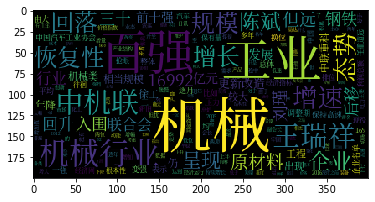

In [21]:
plt.imshow(wc.generate_from_frequencies(machine_new_keywords_dict))

In [22]:
shenzhen_social_news = get_keywords_of_a_ducment(news_content[5])

In [23]:
shenzhen_social_news

[('板块', 21.691726327172162),
 ('A股', 18.5511429457031),
 ('上涨', 17.3435128080811),
 ('MSCI', 16.211647928901478),
 ('金融股', 14.697620495436507),
 ('指数', 12.446075084191657),
 ('格局', 11.55496835561506),
 ('市场', 10.676792195864486),
 ('涨幅', 9.97856372293635),
 ('纳入', 9.402396582431741),
 ('成分股', 8.994356443059447),
 ('权重', 8.228538927749529),
 ('证券', 7.701678783333777),
 ('存量', 7.3788028042969085),
 ('利好', 7.289751270858462),
 ('金融', 7.2633712058703495),
 ('资金', 7.167263750505297),
 ('震荡', 6.912003938434626),
 ('收红', 6.867694767829172),
 ('非银行', 6.745155454351327),
 ('白马股', 6.227024466110437),
 ('风格', 6.2215185848738015),
 ('周四', 5.753628724799886),
 ('信托', 5.739151906952047),
 ('行业', 5.674865379974843),
 ('交替', 5.670180056273419),
 ('周三', 5.529681205912021),
 ('博弈', 5.3336080295694),
 ('市值', 5.133510100388323),
 ('增量', 5.122852433378189),
 ('占', 5.053275939057207),
 ('两市', 5.004224430946225),
 ('股多', 4.9523613237924735),
 ('只', 4.770073931980545),
 ('小幅', 4.742872696233709),
 ('依旧', 4.40

In [24]:
from PIL import Image

In [44]:
import numpy as np

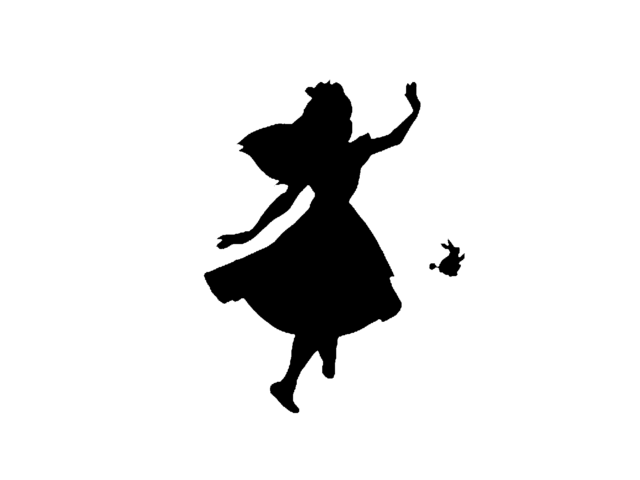

In [26]:
Image.open('/mnt/hgfs/nlp/alice.png')

In [27]:
apple_mask = np.array(Image.open('/mnt/hgfs/nlp/alice.png'))

In [28]:
apple_mask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

In [29]:
wordcloud_with_mask = wordcloud.WordCloud(
font_path='/mnt/hgfs/nlp/SourceHanSerifSC-Regular.otf', 
mask=apple_mask,
background_color='white',
contour_color='black',
contour_width=1
)

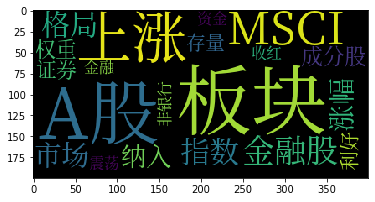

In [30]:
plt.imshow(wc.generate_from_frequencies({w:s for w, s in shenzhen_social_news[:20]}))

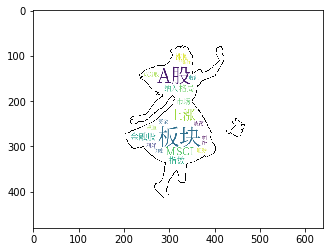

In [31]:
plt.imshow(wordcloud_with_mask.generate_from_frequencies({w:s for w, s in shenzhen_social_news[:20]}))

## TFIDF Vectorizezd

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
vectorized = TfidfVectorizer(max_features=10000)

In [39]:
sample_num = 50000
sub_samples = news_content[:sample_num]

In [65]:
X = vectorized.fit_transform(sub_samples)

In [71]:
np.where(X[0].toarray())

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([  35,   46,  302,  912,  933, 1546, 1743, 1819, 1844, 2558, 2635,
        2734, 3974, 4113, 4132, 4405, 4505, 4525, 4802, 4878, 5628, 5738,
        5760, 5808, 5892, 6195, 6880, 7319, 7338, 7607, 7662, 9082, 9141,
        9631]))

In [41]:
X.shape

(50000, 10000)

In [42]:
vectorized.vocabulary_

{'此外': 6195,
 '本周': 5892,
 '12': 35,
 '小米': 3974,
 '手机': 4878,
 '15': 46,
 '其余': 1844,
 '暂停': 5738,
 '更新': 5760,
 '发布': 2635,
 '开发': 4405,
 '影响': 4525,
 '确保': 7338,
 '工程师': 4132,
 '可以': 2734,
 '集中': 9631,
 '全部': 1743,
 '精力': 7662,
 '进行': 9141,
 '工作': 4113,
 '有人': 5808,
 '猜测': 6880,
 '主要': 912,
 '研发': 7319,
 '之中': 933,
 '去年': 2558,
 '一年': 302,
 '时候': 5628,
 '当然': 4505,
 '关于': 1819,
 '信息': 1546,
 '我们': 4802,
 '还是': 9082,
 '等待': 7607,
 '作为': 1440,
 '唯一': 2966,
 '通过': 9249,
 '10': 12,
 '平台': 4255,
 '认证': 8554,
 '处理器': 3331,
 '强调': 4481,
 '不会': 551,
 '因为': 3045,
 '考虑': 7980,
 '性能': 4642,
 '核心': 6069,
 '相反': 7212,
 '他们': 1242,
 '联手': 8020,
 '微软': 4579,
 '找到': 4949,
 '一种': 344,
 '适合': 9193,
 '兼顾': 1864,
 '完美': 3783,
 '方案': 5537,
 '报道': 5026,
 '已经': 4156,
 '拿到': 5092,
 '一些': 253,
 '以便': 1259,
 '更好': 5757,
 '理解': 6966,
 '架构': 6022,
 '资料': 8791,
 '显示': 5703,
 '一款': 332,
 '集成': 9638,
 '传统': 1355,
 '节省': 8201,
 '至少': 8132,
 '30': 103,
 '空间': 7498,
 '按计划': 5124,
 '今年': 1217,
 '联想': 8019,
 '首发': 982

In [45]:
np.where(X[0].toarray()) # get the positions which values are not zero

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([  35,   46,  302,  912,  933, 1546, 1743, 1819, 1844, 2558, 2635,
        2734, 3974, 4113, 4132, 4405, 4505, 4525, 4802, 4878, 5628, 5738,
        5760, 5808, 5892, 6195, 6880, 7319, 7338, 7607, 7662, 9082, 9141,
        9631]))

In [46]:
news_content[0]

'此外   自 本周   6 月 12 日   起   除 小米 手机 6 等 15 款 机型 外   其余 机型 已 暂停 更新 发布   含 开发 版   体验版 内测   稳定版 暂不受 影响   以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作   有人 猜测 这 也 是 将 精力 主要 用到 MIUI   9 的 研发 之中   MIUI   8 去年 5 月 发布   距今已有 一年 有余   也 是 时候 更新换代 了   当然   关于 MIUI   9 的 确切 信息   我们 还是 等待 官方消息\n'

In [47]:
import random 

In [48]:
document_id_1, document_id_2 = random.randint(0, 1000), random.randint(0, 1000)

In [49]:
document_id_1

598

In [50]:
document_id_2

306

In [51]:
news_content[document_id_1]

'百幅 珍贵 图片 展示   大国 之翼   大国 之翼   中国 大 飞机 研制 历程 摄影 巡回展   上海 首展 6 月 19 日 在 上海图书馆 开幕   为期 3 天   这是 上海 出版界 首个 国家 艺术 基金项目   首次 公开 展示 了 中国 大 飞机 研制 历程 的 100 多幅 珍贵 图片   生动 再现 我国 C919 大型 客机 和 ARJ21 新 支线 飞机 研制 的 艰辛 历程 和 精彩 瞬间   展览 入口   1   10 的 C919 大型 客机 原版 模型 夺人 眼球   100 余张 精美图片 分为 冲天   探索   突破   匠心 4 个 章节   记录 了 中国 大 飞机 研制 历程 的 关键 节点   这些 图片 从 6000 多张 珍贵 的 历史 照片 中 精选 而出   照片 作者 中 既有 从业 数十年 的 专业 摄影师   也 有 大 飞机 事业 的 亲历者 和 航空 爱好者   今年 5 月 5 日   C919 大型 客机 由 机长 蔡俊   试飞员 吴鑫 驾驶   搭载 着 观察员 钱进 和 试飞 工程师 马菲   张 大伟   于 14 时 从 浦东国际机场 第四 跑道 腾空而起   随后   C919 大型 客机 在 南通 东南 3000 米 高度 规定 空域 内 平稳 飞行 1 小时 19 分钟   完成 所有 预定 试飞 科目   并于 15 时 19 分 安全 返航 着陆   展览 开幕式 上   C919 大型 客机 首 飞机 组成员 马菲 来到 现场   他 与 中国 商用 飞机 有限责任 公司 C919 大型 客机 专家 咨询 组成员   ARJ21 新 支线 飞机 原总 设计师 吴兴 世 一起   向 航空 爱好者 赠送 了 C919 飞机 模型   C919 大型 客机 是 我国 首款 完全 按照 适航 标准 和 主流 市场 标准 研制 的 单通道 干线 飞机   目前 已 获得 国内外 24 家 客户 600 架 订单   ARJ21 新 支线 飞机 是 我国 首次 按照 国际 民航 规章 自行 研制 的 中短程 新型 涡扇 支线 飞机   去年 6 月 28 日 投入 航线 运营   目前 载客 超过 10000 人   此次 摄影展 首次 向 公众 展示 中国 大 飞机 研制 历

In [52]:
news_content[document_id_2]

'央广网 大连 6 月 23 日 消息   记者 张 四清   大连商品交易所 发布 消息 说   日前   大连商品交易所 与 中国建设银行 在 大连 续签 全面 战略 合作 协议   大连商品交易所 理事长 李正强   总经理 王凤海   建设银行 总行 执行 董事   副行长 章 更生 及 双方 代表 举行 了 会谈 并 出席 签约 仪式   据 了解   2013 年 以来   大商所 着力 突破 期货市场 服务 实体 经济 的 薄弱环节   以 期货 保证金 存管 业务 资格 放开 为 契机   开始 大力 推动 银期 合作   2014 年   大商所 与 建设银行 在 北京 签署   战略 合作 协议   此后 双方 在 期货 保证金 存管   铁矿石 期货 国际化   期货 资管   标准 仓单 银行 质押 融资 等 方面 开展 了 合作   成效显著   三年 来   双方 就 铁矿石 期货 国际化 合作 开展 课题 研究   联合 建银 国际 在 境外 开展 铁矿石 品种 的 投资者 交流会   并 合作 完成 了 铁矿石 期货 国际化 系统升级 及 测试   建设银行 还是 较 早 提供 大商所 标准 仓单 质押 融资 服务 的 银行 之一   曾 完成 大商所 首单 标准 仓单 融资 业务   记者 了解 到   深化 银期 合作 是 近年来 大商所 一项 重点 工作   今年   大商所 在 原有   1   6   银期 合作 模式 基础 上   创新 推出   1   N   银期 合作 模式   重点 推进 包括 铁矿石 期货 国际化   保险   期货   融资   业务   商品 期货 指数 及 基金   仓单 质押 融资   场外 市场 建设   银期 信息 共享 与 市场推广   交割 仓库 监管 等 方面 的 合作   本次 续签 的 战略 合作 协议 在 双方 良好 合作 基础 上   结合 近年 合作 经验 及 业务 发展 情况   对原 协议 进行 了 丰富 和 完善   内容 更 符合 双方 合作 重点   为 双方 未来 合作 进一步 明确 了 方向   市场 人士 表示   本次 大商所 与 建设银行 续签 战略 合作 协议   可以 充分发挥 双方 各自 优势   通过 强强联合   优势互补   合作 共赢 

In [53]:
vector_of_d_1 = X[document_id_1].toarray()[0]

In [54]:
vector_of_d_2 = X[document_id_2].toarray()[0]

In [55]:
vector_of_d_2

array([0., 0., 0., ..., 0., 0., 0.])

In [56]:
random_choose = random.randint(0, 1000)

In [57]:
random_choose

43

In [58]:
news_content[random_choose]

'上周 周末   中超 第 13 轮 已经 全部 战罢   其中   广州 恒大 战胜 贵州 恒丰 智诚   豪取 联赛 九 连胜 的 同时 继续 领跑 积分榜   队内 的 曾诚 与 张琳芃 也 入选 了 本轮 中超 的 最佳阵容   门将   曾诚   尽管 在 国家队 表现 不佳   但 回到 俱乐部 的 曾 诚仅 用 了 一场 比赛 就 为 自己 实现 了 正名   全场 5 次 扑救 则 次次 关键   而且   曾诚 还 扑 出 了 耶拉 维奇 可能 扳平 比分 的 点球   力助恒 大豪 取九 连胜   后卫   张琳芃   攻防 俱佳 的 张莫斯   此役 在 防守 端 贡献 6 次 解围   3 次 拦截 和 2 次 抢断   在 进攻 端   张琳芃 则 有 4 次 传中 和 1 次 突破   并 直接 助攻 了 郜林 打破 僵局 的 进球   戈麦斯   这 一轮 他 共 做出 了 8 次 解围   3 次 拦截   1 次 抢断   作为 队长 出战 的 戈麦斯 继续 扮演着 建业 铁闸 的 角色   伊斯梅 洛夫   本场 面对 气势汹汹 的 江苏 苏宁   伊斯梅 洛夫 在 防守 端 6 次 解围   3 次 抢断   此外 还有 3 次 封堵 射门 和 1 次 拦截   是 亚泰 客场 告捷 的 幕后英雄   李磊   京津 德比 中 李磊 送出 5 次 抢断   3 次 拦截 和 1 次 解围 的 全面 数据   而且 他 还 助攻 伊尔 马兹 取得 进球   中场   姆 比亚   本轮 比赛   姆 比亚 在 与 权健 中场 核心 维特 塞尔 的 对抗 中 丝毫 不 落下风   最后 时刻 还 用 一记 制胜球 助 华夏 幸福 继续 取胜   张晓彬   出任 后腰 的 张晓彬 做出 5 次 抢断   4 次 拦截   传球 成功率 超过 90   他 在 中场 全面 的 表现 也 在 赛后 得到 了 好评   多 奇 卡尔   此役   多 奇 卡尔 先是 造成 了 对手 的 乌龙球   随后 又 巧妙 助攻 哈维尔 破门 锁定 胜局   可以 说 是 建业 取胜 的 最大 功臣 之一   前锋   曹赟定   全场 完成 4 次 射门   并 送 出 3 次 威胁 传球   此外 还有 惊人 的 8 次 突破 和 12 次 传

In [59]:
from scipy.spatial.distance import cosine

In [60]:
def distance(v1, v2): return cosine(v1, v2)

In [62]:
distance([1, 1], [2, 3])

0.019419324309079777

In [72]:
distance(X[random_choose].toarray()[0], X[document_id_1].toarray()[0])

0.9917564781454604

In [73]:
distance(X[random_choose].toarray(), X[document_id_1].toarray())

0.9917564781454604

In [64]:
distance(X[random_choose].toarray()[0], X[document_id_2].toarray()[0])

0.9915439802009749

In [ ]:
news_content[320]

In [ ]:
news_content[72]

In [ ]:
news_content[85]

In [ ]:
news_content[8]

In [59]:
sorted(list(range(10000)), key=lambda i: distance(X[random_choose].toarray()[0], 
                                      X[i].toarray()[0]))

/home/qinhao/anaconda3/envs/py3/lib/python3.6/site-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


[642,
 498,
 209,
 49,
 43,
 24,
 75,
 38,
 28,
 109,
 35,
 93,
 81,
 27,
 77,
 114,
 33,
 7,
 15,
 26,
 54,
 105,
 111,
 80,
 116,
 23,
 20,
 1,
 21,
 73,
 94,
 25,
 98,
 29,
 83,
 13,
 65,
 106,
 84,
 40,
 4,
 107,
 22,
 42,
 6,
 117,
 36,
 52,
 68,
 48,
 82,
 11,
 91,
 92,
 8,
 97,
 31,
 61,
 70,
 34,
 46,
 71,
 96,
 69,
 50,
 101,
 63,
 5,
 64,
 110,
 85,
 41,
 56,
 14,
 112,
 59,
 30,
 58,
 88,
 37,
 60,
 66,
 108,
 113,
 115,
 3,
 39,
 72,
 57,
 10,
 19,
 119,
 16,
 18,
 62,
 44,
 86,
 9,
 78,
 47,
 55,
 67,
 99,
 89,
 79,
 51,
 76,
 118,
 95,
 0,
 102,
 90,
 12,
 104,
 17,
 53,
 2,
 32,
 45,
 87,
 100,
 103,
 617,
 487,
 624,
 495,
 611,
 513,
 517,
 128,
 458,
 261,
 387,
 197,
 1049,
 399,
 529,
 410,
 1206,
 483,
 989,
 982,
 967,
 993,
 972,
 971,
 976,
 979,
 973,
 977,
 981,
 992,
 998,
 991,
 986,
 985,
 963,
 962,
 974,
 968,
 975,
 978,
 996,
 965,
 984,
 970,
 987,
 983,
 961,
 980,
 969,
 960,
 994,
 999,
 988,
 964,
 966,
 990,
 995,
 997,
 1095,
 310,
 333,
 162,
 5

## Build Search Engine 

```
Input: Words
Output: Documents
```

In [67]:
def naive_search(keywords):
    news_ids = [i for i, n in enumerate(news_content) if all(w in n for w in keywords)]
    # O(D * w) 

In [68]:
%%timeit
naive_search('美军 司令 航母'.split())

238 ms ± 7.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [69]:
len(news_content)

89611

### Input word -> the documents which contain this word

In [70]:
X.shape

(50000, 10000)

In [71]:
transposed_x = X.transpose().toarray()

In [72]:
word_2_id = vectorized.vocabulary_

In [73]:
word_2_id['今天']

1216

In [74]:
id_2_word = {d: w for w, d in word_2_id.items()}

In [75]:
id_2_word[6195]

'此外'

In [76]:
set(np.where(transposed_x[6195])[0])

{0,
 24582,
 40973,
 18,
 32788,
 32793,
 32794,
 24604,
 29,
 30,
 31,
 32796,
 24609,
 32800,
 32802,
 32803,
 43,
 32825,
 70,
 24658,
 32859,
 96,
 101,
 49253,
 49255,
 32875,
 49264,
 24689,
 49266,
 119,
 24718,
 150,
 24728,
 24729,
 24731,
 49307,
 163,
 165,
 167,
 170,
 41131,
 172,
 49329,
 178,
 187,
 190,
 32959,
 193,
 195,
 49357,
 218,
 238,
 49393,
 49397,
 49407,
 259,
 261,
 264,
 265,
 268,
 270,
 49425,
 16662,
 41245,
 293,
 24877,
 303,
 49455,
 305,
 49458,
 320,
 24897,
 323,
 326,
 16712,
 49481,
 33110,
 16727,
 16729,
 49498,
 33115,
 354,
 359,
 362,
 364,
 16755,
 33143,
 378,
 33148,
 381,
 33149,
 49535,
 386,
 41348,
 394,
 33162,
 33165,
 33166,
 16787,
 24983,
 49566,
 41376,
 49572,
 16806,
 41383,
 424,
 425,
 16808,
 16818,
 25011,
 16822,
 442,
 25021,
 16837,
 456,
 25035,
 41419,
 41423,
 49617,
 16850,
 16853,
 472,
 476,
 477,
 33244,
 41440,
 16870,
 25068,
 49654,
 504,
 41466,
 49658,
 49660,
 25086,
 41470,
 512,
 25089,
 16904,
 41484,
 

In [77]:
'美军'

'美军'

In [78]:
word_2_id['美军']

7922

In [79]:
word_2_id['司令']

2769

In [80]:
usa_force = set(np.where(transposed_x[7922])[0])

In [81]:
commander = set(np.where(transposed_x[2769])[0])

In [82]:
usa_force & commander

{836,
 1218,
 1613,
 1935,
 2844,
 3160,
 3283,
 3309,
 3959,
 3984,
 4244,
 4908,
 5216,
 5236,
 6824,
 7748,
 12832,
 18893,
 21484,
 21523,
 22987,
 28259,
 28414,
 28495,
 28514,
 28523,
 28539,
 29037,
 29633,
 29668,
 36678,
 39638,
 39657,
 40001,
 40025,
 41096,
 43204,
 43702,
 44024,
 46315,
 46828}

In [83]:
from functools import reduce

In [84]:
d1, d2, d3 = {1, 2, 3}, {4, 5, 6, 3, 2}, {1, 3, 4}

In [85]:
from operator import and_

In [86]:
reduce(and_, [d1, d2, d3])

{3}

In [87]:
def search_engine(query):
    """
    @query is the searched words, splited by space
    @return is the related documents which ranked by tfidf similarity
    """
    words = query.split()
    
    query_vec = vectorized.transform([' '.join(words)]).toarray()[0]

    candidates_ids = [word_2_id[w] for w in words]
    
    documents_ids = [
         set(np.where(transposed_x[_id])[0]) for _id in candidates_ids
    ]
    
    merged_documents = reduce(and_, documents_ids)
    # we could know the documents which contain these words
    sorted_docuemtns_id = sorted(merged_documents, key=lambda i: distance(query_vec, X[i].toarray()))

    return sorted_docuemtns_id

In [88]:
np.where(vectorized.transform(['美联储 加息 次数']).toarray()[0])

(array([2253, 6150, 7944]),)

In [89]:
text = """新华社洛杉矶４月８日电（记者黄恒）美国第三舰队８日发布声明说，该舰队下属的“卡尔·文森”航母战斗群当天离开新加坡，改变原定驶往澳大利亚的任务计划，转而北上，前往西太平洋朝鲜半岛附近水域展开行动。\n　　该舰队网站主页发布的消息说，美军太平洋司令部司令哈里·哈里斯指示“卡尔·文森”航母战斗群向北航行。这一战斗群包括“卡尔·文森”号航空母舰、海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。\n　　“卡尔·文森”号航母的母港位于美国加利福尼亚州的圣迭戈，今年１月初前往西太平洋地区执行任务，并参与了日本及韩国的军事演习。\n　　美国有线电视新闻网援引美国军方官员的话说，“‘卡尔·文森’号此次行动是为了对近期朝鲜的挑衅行为作出回应”。（完）"""

In [90]:
print(text)

新华社洛杉矶４月８日电（记者黄恒）美国第三舰队８日发布声明说，该舰队下属的“卡尔·文森”航母战斗群当天离开新加坡，改变原定驶往澳大利亚的任务计划，转而北上，前往西太平洋朝鲜半岛附近水域展开行动。
　　该舰队网站主页发布的消息说，美军太平洋司令部司令哈里·哈里斯指示“卡尔·文森”航母战斗群向北航行。这一战斗群包括“卡尔·文森”号航空母舰、海军第二航空队、两艘“阿利·伯克”级导弹驱逐舰和一艘“泰孔德罗加”级导弹巡洋舰。
　　“卡尔·文森”号航母的母港位于美国加利福尼亚州的圣迭戈，今年１月初前往西太平洋地区执行任务，并参与了日本及韩国的军事演习。
　　美国有线电视新闻网援引美国军方官员的话说，“‘卡尔·文森’号此次行动是为了对近期朝鲜的挑衅行为作出回应”。（完）


In [2]:
import re

In [10]:
text = """美国有线电视新闻网援引美国军方官员的话说"""

In [11]:
pat = r'(新闻|官员)'

In [15]:
re.compile(pat).sub(repl="**\g<1>**", string=text)

'美国有线电视**新闻**网援引美国军方**官员**的话说'

In [18]:
re.compile(pat).sub(repl="**\g<1>**", string=text)

'美国有线电视**新闻**网援引美国军方**官员**的话说'

In [95]:
def get_query_pat(query):
    return re.compile('({})'.format('|'.join(query.split())))

In [96]:
get_query_pat('美军 司令 航母')

re.compile(r'(美军|司令|航母)', re.UNICODE)

In [97]:
def highlight_keywords(pat, document):
    return pat.sub(repl="**\g<1>**", string=document) 

In [100]:
highlight_keywords(get_query_pat('美军 司令 航母'), news_content[22987])

'新华社 北京 ４ 月 １ ０ 日电 新闻分析   卡尔   文森   号 **航母** 缘何 成 西太平洋 军情 新 主角   n   新华社 记者 刘莉莉   n   美国 海军 第三 舰队 下属 的   卡尔   文森   号 **航母** 打击 群 即将 抵达 西太平洋 朝鲜半岛 附近 水域   分析 人士 认为   美方 此次 急调 **航母** 打击 群 北上   向 朝鲜 施压 意图 明显   很 可能 会 加剧 朝鲜半岛 紧张局势   n   小标题   侧重 对 地 攻击   n   据 第三 舰队 网站 主页 发布 的 消息   **美军** 太平洋 **司令**部 **司令** 哈里   哈里斯 指示   卡尔   文森   号 **航母** 打击 群从 新加坡 向北 航行   这一 打击 群 还 包括 海军 第二 航空队   两艘   阿利   伯克   级 导弹 驱逐舰 和 一艘   泰孔 德罗 加   级 导弹 巡洋舰   n   卡尔   文森   号 是   尼米兹   级 核动力 **航母**   母港 位于 美国 加利福尼亚州 的 圣迭戈   今年 １ 月初   卡尔   文森   号 曾 前往 西太平洋地区 执行 任务   并 参与 美日韩 三国 军事演习   尼米兹   级 **航母** 是 核动力 多用途 **航母**   也 是 美国 海军 远洋 作战 群 的 核心 力量   n   卡尔   文森   **航母** 打击 群中   阿利   伯克   级 导弹 驱逐舰 和   泰孔 德罗 加   级 导弹 巡洋舰 也 不可 小视   阿利   伯克   级 导弹 驱逐舰 是 世界 上 最先 配备 四面 相控阵 雷达 的 驱逐舰   舰队 防空 是 其 主要 作战 任务   泰孔 德罗 加   级 导弹 巡洋舰 的 武器 配备 也 比较 全面   涵盖 了 反潜   反舰   防空 和 对 地 ４ 个 种类   n   据 军事 专业人士 介绍   **航母** 打击 群 与 **航母** 战斗群 其实 是 两个 概念   战斗群 侧重于 夺取 制海权   例如 海战   而 **航母** 打击 群 更 侧重于 对 地 攻击 作战   一般而言   打击 群 的 舰艇 数量 要远 少于 战斗群   n   小标题   配角

In [106]:
from IPython.display import display, Markdown

In [107]:
def search_engine_with_pretty_print(query):
    candidates_ids = search_engine(query)
    for i, _id in enumerate(candidates_ids):
        title = '## Search Result {}'.format(i)
        c = news_content[_id]
        c = highlight_keywords(get_query_pat(query), c)    
        
        display(Markdown(title + '\n' + c))

In [108]:
search_engine_with_pretty_print('春节 假期')

## Search Result 0
最近   不少 人 在 朋友圈 等 个人 社交 媒体 上吐槽 打车 难   人们 发现   不仅 在 早晚 高峰   甚至 是 传统 的 非 高峰 时段   都 出现 了 路 上扬 招 成功率 越来越低   打车 软件 不 加价 或是 加价 少 难以 吸引 司机 接单 的 情况   而 类似 的 情况   在 上海   北京   武汉 等 地 都 或多或少 地 存在   对此   一些 城市 迅游车 的 驾驶员 们 表示   历年 **春节** 前   都 会 遇到 活多车 少 的 情况   对 司机 而言   能 加价 赚 到 钱   何乐而不为 呢   21 日晚 8 点   滴滴 高级 产品 总监 罗文 在 知乎 上 发文 回应 称   根据 后台 数据 显示   今年 司机 回家 早   运力 下降   在 其 晒 出 有关   滴滴 在线 司机 数据   和   北京 订单 需求   的 两张 手绘 图表 中   虽然 隐去 了 具体 数值   但 可以 明显 看出   前 一张 图表 近期 呈现 了 直线 下降 趋势   标注 数据 显示 下降 超过 25   而 出行 订单 数量 则 同期 上涨 了 3 成   不过   在线 司机 变少 的 情况   仅仅 是因为 临近 **假期**   专车 司机 纷纷 提早 回家 过年 造成 的 吗   相关 数据 显示   自 去年 国庆 之后   地方 版网 约 车 新政 陆续 出台 后   市场 上 的 网约车 供给量 就 呈现出 大幅 减少 的 趋势   以 上海 为例   网约车 新政 之后   上海 合规 的 网约车 数量 只有 1 万辆 左右   市场 供给 大幅 减少   打车 难 开始 悄然 回潮   与此同时   网约车 市场 过度 集中   部分 平台 一家独大   也 让 消费者 瞬间   难以 从 补贴 优惠 的 温情脉脉 中 回过 神来   瞬间 跌入 了 加价 才能 叫 到 车 的 冰冷 现实 中   一位 Uber 中国 早期 员工 指出   滴滴 打车 软件   自动 设置 了 加价 选项   即便 第一次 加价 没 被 接单   还 可以 再次 加价 叫车   司机 知道 用户 可以 多次 选择 加价   就 有意 不接 那些 不 加价 的 单子   他 知道 你 叫 不到 车 就 会 提高 小费   就 故意 等 着   于是   这个 潜规则 的 结果   就是 乘客 反复 加价 才能 叫 到 车   既 浪费 了 时间   也 付 了 更 多 的 钱   对于 近日 有 消费者 称 打车 难   打车 贵 的 问题   23 日 下午   滴滴 出行 官方 微博 发布   致 广大 用户 的 一封信   表示   将 从即日起   在 全国 范围 内 阶段性 取消 出租车   建议 调度 费   功能   以 减少 因为 春运期间 本身 供不应求 和 价格 因素 带来 的 体验 问题   滴滴 方面 表示   此举 将 有 可能 给 部分 乘客 带来 呼叫 等待时间 的 增加   以及 打车 成功率 降低 的 影响   不过   为了 鼓励 在 **春节** 期间 坚持 出车 的 司机 师傅   仍会 保留 用户 主动 给予 调度 费 的 功能   **春节** 过后 会 根据 用户 的 反馈 再 做 决策   并 强调   所有 调度 费 滴滴 分文不取


## Search Result 1
n 新华社 上海 4 月 4 日新 媒体 专电 题   中国 人 愿意 为 旅游 投入 更 多 时间 和 金钱   n 新华社 记者 陈爱平   许晓青   n28 岁 的 上海 白领 林夏 今年 清明节 没有 留在 家乡   而是 提前 请 了 年 假   赴 印度洋 上 的 岛国 斯里兰卡 自助游   n   一个 人 全部 花费   不 超过 1 万元 人民币   约等于 一个月 的 工资   完全 可以 负担得起   她 说   n 对于 不少 中国 人 来说   旅游 已经 成为 一种   生活必需品   n   n   图为 在 上海市 徐汇区 的 一家 旅行社 门店   一位 市民 询问 欧洲游 情况   新华社 记者 陈爱平 摄   n   n 除了 扫墓 祭祖   踏青 赏花   中国 的 清明节 **假期** 也 成为 出游 旺季   国内游   出境游 人数 都 不可 小觑   n 前不久   记者 来到 上海市 黄浦区 出入境 办证 中心 大厅   工作人员 说   今年以来   前来 办理 出入境 证件 的 居民 络绎不绝   尤其 是 祖孙三代 一 起来 办理 证件 的 全家 出 行者 增多   除了 **春节** 七天 长假   还有 清明   五一   端午 等 三天 左右 的 小 长假   这些 **假期** 到来 前 的 一个月   突击   办理 出入境 证件 的 居民 往往 会 扎堆   n 中国   2016 年 国民经济 和 社会 发展 统计 公报   显示   2016 年   全国 国内 游客 44 亿人次   比 上年 增长 11   2   国内 居民 出境 13513 万人次   增长 5   7   n 旅游 消费 旺盛 的 趋势 在 2017 年 开年 后 仍然 延续   根据 中国国家旅游局 数据中心 综合 测算   2017 年 **春节** 期间   全国 共 接待 游客 3   44 亿人次   同比 增长 13   8   实现 旅游 总收入 4233 亿元   同比 增长 15   9   n   n   斯里兰卡 的   狮子岩   景区   由林夏 提供   n   n 远 在 北欧 的 瑞典   当地 的 旅游 主管部门 也 感受 到 了 中国 人 越来越 高涨 的 出游 热情   n 统计 显示   2017 年 1 月   中国 游客 在 瑞典 全国 的   间 夜量   衡量 酒店 在 一定 时间 内 出租率 的 计算 单位   同比 增长 74   2   同期   瑞典 首都 斯德哥尔摩   总间 夜量   增长 超过 10   其中 中国 游客 增长幅度 最为 显著   高达 82   n 瑞典 旅游局 中国区 首席代表 李春梅 表示   瑞典 冬季 旅游 市场 在 中国 发展 迅速   得益于 中国 游客 对于 新鲜 目的地 和 独特 旅游 体验 的 旺盛 需求   n 在线 旅行社 携程 旅行网 近日 发布 的   2017 中国 旅游者 意愿 调查报告   研判   中国 人 愿意 为 旅游 投入 更 多 的 时间 和 金钱   n 报告 称   2017 年   98   的 受访者 有 出游 意愿   其中 计划 出行 频次 1   3 次 的 受访者 占 比 72   计划 出行 4   6 次 的 受访者 占 比 19   n 作为 一种   必需品   旅游 正 成为 中国 人 消费 的 重要 支出   同 是 携程 这份 根据 2   5 亿 会员 进行 的 随机 抽样调查 及大 数据分析 报告 显示   57   的 受访者 预计 全年 旅游 花费 占 年收入 的 10   以上   19   的 受访者 甚至 愿意 将 20   的 年收入 用于 旅游   从 具体 金额 来看   73   的 受访者 表示   全年 旅游 人均 花费 将 超过 1 万元   n   n   超过 5 成 受访者 预计 全年 旅游 花费 占 年收入 的 １ ０   以上   由 携程 旅行网 提供   n   n 林夏 在 接受 采访 时 也 证实   自己 花费 在 旅游 上 的 年均 消费   大约 为 2 万元   n 专家 分析   随着 中国 居民收入 提升   在 旅游 方面 的 支出 提升 成为 居民消费 升级 的 例证   多花 一点 钱   可以 多 体验 一点 旅行 的 幸福感   这 成为 大部分 游客 的 一项 共识   n 也 正是 基于 上述 原因   多家 在线 旅行社 大 数据 显示   越来越 多 的 中国 居民 愿意 选择 更 舒适 的 酒店   体验 美食 和 享受 服务   旅游 产品 亦 更加 多样化   定制 游   自由 行等 选择 空间 更大   亲子 游   中老年 游等 满足 社会 多层次 需求 的 旅游 产品 在 2017 年 将 持续 火爆   n 从 出行 时间 看   携程 报告 显示   随着 带薪休假 制度 的 落实 以及 中国 居民 出行 观念 的 改变   利用 年 假   周末 出游 的 受访者 分别 占 比 52   7   及 19   n 清明节 **假期**   仅 4 月 2 日 当天   上海 顾村 公园 就 刷新 了 接待 游客 纪录   迎来 18   29 万人   驴 妈妈 旅游网 分析   今年 国内 赏樱 游人 次 预计 同比 增长 近 7 成   n 驴 妈妈 旅游网 介绍   赏花   亦 是 近期 出境 旅游 的 热词 之一   清明节 前后   赴 日赏 樱游 预订 人次 较 去年同期 增加 了 近 3 成   n   n   无锡 十八 湾 风景区 赏花 游人 络绎不绝   由 驴 妈妈 旅游网 提供   n   n 上海财经大学 旅游 管理 系主任 何建民 分析   旅游 成为 中国 居民 的   必需品   亦 成为 中国 国民经济 的   必需品   见证 着 中国 正在 推进 的 供给 侧 改革   n 中国国家旅游局 数据 显示   全国 旅游 直接 投资 在 2016 年 达到 12997 亿元   同比 增长 29   05   而据 联合国 世界旅游组织 测算   2016 年 中国 旅游业 对 国民经济 综合 贡献率 达 11   对 社会 就业 综合 贡献 超过 10   26   n 此前 中国 发布 的   十三 五   旅游业 发展 规划   提出   十三 五   时期 旅游业 对 国民经济 的 综合 贡献度 达到 12   对 餐饮   住宿   民航   铁路 客运 业 的 综合 贡献率 达到 85   以上   年均 新增 旅游 就业人数 100 万人 以上   n 今年 3 月初 公布 的   十三 五   全国 旅游 公共服务 规划   重点 部署 了 未来 旅游 公共服务 发展 的 16 项 重点 工程   专家 认为   这 将 为 中国 居民 出游 提供 更好 保障   n   我 计划 每年 至少 到 境外 旅游 一次   这样 在 下 一次 更换 护照 的 时候   又 会 收集 到 更 多 各国 特色 的 出 入境签证 及 印章   加上 国内游 短途游   今后 还会花 更 多 钱 和 时间   去 享受 旅行   林夏说   n


## Search Result 2
新华社 北京 3 月 31 日电   记者 魏梦佳   钟雅   记者 31 日 从 北京市 公园 管理中心 获悉   今年 清明 假日 期间   北京市 属 11 家 公园 及 中国 园林 博物馆 将 举办 25 项 假日 游园活动   其中   各大 公园 内 总面积 近 1000 公顷 的 主题 赏花 景区   将 掀起 市民 游客 游园 赏花 热潮   n   目前 北京 各大 公园 内 一片 春意盎然   各类 春花 正 热闹 绽放   北京市 公园 管理中心 表示   今年 春季   市属 11 家 公园 的 春花 观赏 面积 达到 了 园内 绿地面积 的 70   除了 常年 定植 的 四季 花木   各园 还 采用 了 花期 调控   精品 盆栽   室内 花展 等 多种 技术手段 和 展示 方式   使 今春 花卉 布置 总面积 增加 近 10   n   今年 清明 **假期**   各园 近 千公顷 的 赏花 景区 将 成为 市民 游客 度假 的 首选   玉渊潭公园 的 樱花节   陶然亭 公园 的 海棠 春花 节   中山公园 的 郁金香 展   北京植物园 的 桃花节 等 **春节** 赏花 活动 都 已 展开   各色 春花 依山傍水   争相 吐艳   本 周末 还 将 迎来 新一轮 盛花期   其中   陶然亭 公园 栽植 和 展出 的 海棠 达 45 个 品种   3000 多株   n   除 赏花 外   清明 诗 会   民俗 展示   文化 展演   主题 纪念 等 多种 展示 清明 文化 的 活动 也 将 在 陶然亭 公园   玉渊潭公园   中国 园林 博物馆 等 上演   香山 公园 双清 别墅   中山公园 孙中山 像 等 13 处 北京 公园 爱国主义 教育 基地 也 将 迎来 大批 前来 缅怀 祭扫 的 游客 市民   清明 期间   各 公园 内 的 祭扫 纪念 景区 将 市民 及 团体 提供 讲解   举行 纪念 仪式   牌示 导览 等 服务   完   n


## Search Result 3
即将 进入 7 月   对于 城市 学生 而言   美好 的 暑假 又 如期而至 了   而 对于 另 一群 人   留守 儿童 而言   迎接 他们 的 却是 一个   冷清   的 **假期**   离开 了 学校   没有 了 老师 和 同学 的 陪伴   也 没有 父母 的 守护   他们 的 **假期** 是 孤单 而 乏味 的   记者 从 清远 相关 部门 获悉   清远 农村 留守 儿童 约 2   39 万名   数量 在 全省 排名 第四   留守 儿童 长期 缺乏 亲情 关爱 和 有效 保护   处境 堪忧   为 做好 农村 留守 儿童 关爱 保护 工作   促进 农村 留守 儿童 健康成长   近年来   清远 不断完善 制度 方案 为 留守 儿童 撑起   保护伞   就 在 今年 4 月份   清远市 政府 常务会议 审议 了   清远市 关于 加强 农村 留守 儿童 关爱 保护 工作 的 实施方案   稿   提出 建立 考核 机制   强化 激励 问责   对 成效 明显 的   按照 国家有关 规定 予以 激励   对 工作 不力   措施 不 实   造成 不良影响 的   按规定 追究 相关 人员 的 党纪政纪 责任   造成 严重后果 的 将 对 有关 领导 进行 问责   清远市 心理学 会 会长 张万英 认为   不能 让   留守 儿童   成为   缺爱 儿童   不能 经常 和 孩子 在 一起 生活 的 父母   要 争取 多 与 孩子 保持 常态 联系   不要 让   留守 儿童   成为   无助 儿童   政府 要 完善 社区 中 留守 儿童 服务 的 功能   关注 学生 成长 中 遇到 的 生理   心理 问题   采写   整理   魏金锋   半年 难见 爹和娘   的 无奈   每年 七八 月间   都 是 清远 最热 的 时段   而 往日 喧闹 的 校园   一到 这时 便 进入 **假期**   一片 沉寂   留守 儿童 真 凄凉   半年 难见 爹和娘   放学 回家 忙 家务   夜里 梦中唤 爹娘   是 农村 留守 儿童 的 真实写照   在 粤北 山区 的 清远市 农村   半年 难见 爹和娘   的 儿童 实在 是 太 普遍 了   为了 给 家人 更好 的 生活 环境   许多 青壮年 选择 了 背井离乡   他们 像 候鸟 一样   每年 **春节** 刚过   便 飞向 沿海 各个 城市 打工   直到 下 一个 **春节** 的 到来   半年 甚至 几年 不 回家   也 是 常有 的 事   对于 很多 父母 在外 务工 的 农村 留守 儿童 而言   无论是 留在 家里   还是 到 父母 身边 团聚   怎样 度过 长 达 两个 月 的 暑假   都 是 个 难题   一位 经常 在 清远 参加 各种 公益活动 的 志愿者 刘小姐 说   很 多次 当 他们 乘坐 的 车子 进入 到 村头 时   就 像 突然 注入 了 活力 一般   孩子 们 三三两两 飞奔 过来   小村 瞬间 变得 生动 起来   孩子 们 好奇 地 围着 大巴 转   因为 他们 盼望 父母 会 从 车上 走 下来   可惜 不是   目前   清远 农村 留守 儿童 数量 在 全省 排名 第四   留守 儿童 因为 家庭环境 的 特殊性   在 性格 方面 容易 出现 孤僻   偏激   冲动   攻击性 比较 强 等 缺陷   而 亲情 的 缺乏 和 监管 的 缺失   让 他们 更 容易 受到 外界 因素 的 伤害   笔者 走访 了解 到   喜 的 是   由于 父母 不 在 身边   不少 留守 儿童 在 艰难 的 环境 中 早早 学会 了 生存 的 技能   变得 顽强 独立   忧 的 是   个别 留守 儿童 因为 缺乏 大人 监管   安全隐患 重重   留守 儿童 也 牵动 着 政府 的 心   近年来   清远 各地 通过 政府 购买 服务 等 形式   探索 和 创新 解决 留守 儿童 问题 的 方式 和 途径   取得 一定 成效   但 依旧 任重道远   还 需 不断 健全 关爱 留守 儿童 的 法律 和 政策 体系   强化 父母 法定 监护 责任 等 途径   缓解 留守 儿童 问题   亲情 缺失 监管 缺乏 的 隐患   由于 外出 打工 的 父母 长年累月 难得 有 机会 回 一趟 家   留守 儿童 缺乏 父母 的 监护 和 保护   往往 容易 遭受 伤害   比如 溺水   烧伤   车祸 甚至 是 性侵 等等   其实 我们 也 知道 父母 长期 不 在家 对 孩子 的 身心健康 和 学习 会 带来 负面影响   但 这 是 痛苦 无奈 的 选择   家住 清远 阳山 的 何先生 夫妇 感慨 良多   他家 有 一双 儿女   由于 家里 田地 少   经济 窘困   在 小女儿 断奶 后   就 把 孩子 留给 年迈 的 父母 抚养   夫妇俩 到 了 佛山 打工   一 干 就是 9 年 多   每半年 夫妻俩 才 轮流 回家 一两天   9 年 过去 了   夫妻俩 好不容易 挣 了 一些 钱   去年 回家 盖起 了 新楼   并 添置 了 一批 家用电器   可 谁知 由于 他俩 长年 不 在家   两个 孩子 对 父母 的 感情 似乎 都 很 生疏   大儿子 经常 逃学   小小年纪 学会 了 抽烟 饮酒   让 这 何先生 夫妇 非常 伤心   业内人士 指出   留守 儿童 之所以 容易 出 问题   主要 还是 思想道德 教育 得不到 足够 的 重视   由于 学校 师资 力量 及 父母 不 在 身边 教育 的 原因   留守 儿童 思想道德 教育 被 严重 忽视   隔代 监护人 大多 忙于 务农   无暇 教育 儿童   而且   隔代 监护人 由于 自身 素质 限制   教育 水平 不高   手段 不当   不少 留守 儿童 隔代 监护人 采取 暴力手段   教育   儿童   错误 的 教育 方式 导致 错误 的 教育 成果   此外   由于 农村 师资 力量 水平 的 限制   留守 儿童 在 音乐   美术   舞蹈 等 艺术类 学习 上 机会 非常少 甚至 是 基本 空白   乡村 小学 对 体育课   心理健康 教育课 的 师资 投入 极少   留守 儿童 长期 得不到 心理 生理 健康 教育 上 的 辅导   导致 容易 出现 沉迷 网络   电视 及 抽烟 喝酒 等 不良习惯   让 留守 儿童 的 暑假 不再 孤单   张万英 认为   留守 儿童 因为 家庭环境 的 特殊性   在 性格 方面 容易 出现 孤僻   偏激   冲动   攻击性 比较 强 等 缺陷   人格 上 容易 出现 精神 问题   如 抑郁症   焦虑   恐惧   人际交往 障碍 等   在 学习 方面 容易 出现 学习 落后   缺乏 动力 等   跟 家庭 关系 也 会 相对 紧张   容易 跟 家里人 产生 冲突   难以 和谐 相处   农村 留守 儿童 问题 需要 家庭   学校 和 社会 的 共同努力   一是 加快 新 农村 建设 和 小城镇 建设   吸引 外出 农民工 返乡 就业 创业   使 留守 儿童 能够 与 父母 团聚   二是 学校 要 加强 对 留守 儿童 的 关爱 和 照顾   可 通过 及时 家访   定时 为 孩子 做 心理 疏导 等 方式   多方位 关爱 留守 儿童 的 身心健康   三是 政府 要 健全 关爱 留守 儿童 的 法律 和 政策 体系   完善 监护 制度 和 国家 救助 体系   强化 父母 法定 监护 责任   张万英 认为   不要 让   留守 儿童   成为   缺爱 儿童   不能 经常 和 孩子 在 一起 生活 的 父母   要 争取 多 与 孩子 保持 常态 联系   经常 打电话 关心 孩子   了解 他们 的 心理 需要   给予 更 多 的 心理 关爱   如 发现自己 孩子 出现异常 行为   要 及时 和 孩子 沟通   避免 孩子 走上 极端 的 道路   业内人士 指出   相对 于 父母 在 身边 的 孩子 不同   留守 儿童 的 暑假 一般 只有 三个 选择   而 这 三个 选择 都 潜伏着 很大 的 安全隐患   一是 乘车 前往 父母 所在地   与 父母 一起 度过 **假期**   旅途 比较 危险   尤其 是 独自 前往   二是 在家 帮助 爷爷奶奶 干活   小小年纪 很 容易 出现 安全事故   三是 自由 安排   这 是 最 危险 的   没有 大人 看护   孩子 极有 可能 出事   该 业内人士 建议   要 给 孩子 制定 好 科学 作息时间   有 大人 在家 的 应该 严厉 监督   别 让 孩子 养成 坏习惯   在 制定 作息时间 时   父母 们 应该 以 少量 平均 的 安排 学习 任务   避免 孩子 荒废 学业   有大 人家 督 可以 很 好 地 防止 孩子 到处 乱跑   引发 安全事故   因为 暑假 不像 平时 在 学校   孩子 有 同学 朋友 相伴   长时间 的 呆 在 家里   孩子 很 容易 孤单   这 需要 父母 的 关怀 来 开解   不然 很 容易 让 孩子 的 叛逆 情绪 增长 起来   甚至 让 孩子 逐渐 自闭   此外   不妨 借用 智能 设备 掌握 孩子 行踪   避免 孩子 靠近 危险 地带 或 出入 禁止 未成年人 进入 的 场所   把 影响 孩子 成长 的 一切 不安 因素 拒之千里   聚焦   超 6 个 月 不 履行职责 或 撤销 监护 资格   清远市 关于 加强 农村 留守 儿童 关爱 保护 工作 的 实施方案   指出   建立 农村 留守 儿童 摸底 排查 机制   按照 属地 管理   分级 负责 的 原则   建立 县   镇   村   居   委会 关爱 农村 留守 儿童 三级 工作 服务网络   建立 农村 留守 儿童 发现 报告 机制   民政部门 要 会同 财政   教育   卫计   公安   住建   团委 等 部门 和 单位 建立 社会 参与 面广   覆盖面 大   渠道 顺畅 和 相应 快速 的 留守 儿童 报告 网络   制定 留守 儿童 信息 报告 激励 办法   鼓励 社会各界 积极参与 留守 儿童 关爱 保护 工作   对 实施 家庭暴力   虐待 或 遗弃 农村 家庭 留守 儿童 的 父母 或 受 委托 监护人   公安机关 应当 给予 批评 教育   必要 时 给予 治安管理 处罚   情节恶劣 构成犯罪 的   依法 立案侦查   对于 监护人 将 农村 留守 儿童 置于 无人 监管 和 照看 状态 导致 其 面临 危险 且经 教育 不改 的   或者 拒不履行 监护 职责 6 个 月 以上 导致 农村 留守 儿童 生活 无着 的   或者 实施 家庭暴力   虐待 或 遗弃 农村 留守 儿童 导致 其 身心健康 严重 受损 的   其 近亲属   村   居   委会   县 民政部门 等 有关 人员 或 单位 要 依法 向 人民法院 申请 撤销 监护人 资格   另行 指定 监护人   方案 指出   父母 要 依法 履行 对 未成年 子女 的 监护 职责 和 抚养 义务   外出 务工人员 要 尽量 携带 未成年 子女 共同 生活 或 父母 一方 留家 照料   暂 不 具备条件 的 应当 委托 有 监护 能力 的 亲属 或 其他 成年人 代为 监护   不得 让 未满 16 周岁 的 儿童 脱离 监护 单独 居住 生活   外出 务工 时   父母 要 向 当地 村   居   委会 报告 外出 务工 及 留守 儿童   委托 监护人 的 情况   父母 或 其他 监护人 不 依法 履行 监护 职责   村   居   委会   公安机关 和 有关 部门 要 及时 上门 予以 劝诫   制止   情节严重 或 造成 严重后果 的   公安机关 等 要 依法追究 其 责任   强化 家庭 监护 主体 责任   加大 教育部门 和 学校 关爱 保护 力度   各 县级 政府 要 完善 控辍 保学 部门 协调 机制   督促 监护人 送 适龄儿童   少年 入学 并 完成 义务教育   教育部门 要 负责 落实 免费 义务教育 和 教育 资助 政策   确保 农村 留守 儿童 不 因 贫困 而 失学   改善 留守 儿童教育 条件   加强 留守 儿童教育 基础设施 建设   优化 农村 义务教育 学校 布局   关注   如何 防止 留守 儿童 溺亡 悲剧   清远 是 依山傍水 的 城市   每到 夏季   游泳 是 不少 人 的 至爱   尤其 在 学生 放假 期间   江河 边 戏水 似乎 成 了 一种 不可或缺 的 乐趣   可惜 几乎 每年 都 有 学生 溺水 身亡 的 事故 发生   留守 儿童 的 安全 一直 是 个 大 问题   在 上学时 有 学校 的 约束 还好   可是 一旦 放假 后   父母 又 不 在 身边   家里 老人 又 看 不住 孩子   孩子 的 身边 就 像 埋藏 了 无数颗 炸弹   而且 儿童 自救 能力 较差   不少 去 玩水 的 儿童 都 不会 游泳   但 在 同伴 邀约 下   冒险 下水 嬉戏   溺水 后   由于 同伴 大多 年纪 小   能力 有限   一旦 遇险   惊慌失措   难以 互救   极易 发生 群体 溺亡 事故   笔者 从 清远市 教育部门 获悉   近年来   清远 全市 因 溺水 事故 死亡 学生 每年 都 有 10 人 左右   占 所有 非正常 死亡 学生 数 的 大约 一半   为此   今年 5 月份 召开 的 清远 全市 防 溺水 视频 工作 会议 强调   各地 各 部门 要 把 预防 学生 溺水 工作 纳入 当前 重要 议事日程   抓好 辖区 内 中小学   幼儿园 安全 管理   加强 安全 宣传教育   强化 周边 水域 排查   加强 隐患 整改   对 因 制度 不 健全   管理 不 到位   责任 不 落实   导致 安全 责任事故 的   将 按照 有关 规定 严肃 追究 相关 人员 的 责任   学校 还要 会同 村委会   社区 居委会   做好 校园 及其 周边 溺水 安全隐患 的 排查   一方面 要 在 校内 水池   河道   沟渠 等易 发生 溺水 的 地方 设置 警示 标志   加强 防护 设施   另一方面 要 通过 教师   学生家长 或 社区 居委会   村委会 摸清 学校 周边 各类 江河   池塘   溪流 等 水域 的 安全隐患   在 校内 提前 对 学生 进行 安全 警示   据悉   清远市 政府 将 组织 相关 人员 成立 督查组   对 各地 及 相关 部门 的 防 溺水 工作 落实 情况 进行 督查   对 发生 安全事故 的   要 按照   四 不放过   原则   加强 责任 追究   对 因 制度 不 健全   管理 不 到位   责任 不 落实   导致 安全 责任事故 的   要 按照 有关 规定 严肃 追究 相关 人员 的 责任


## Search Result 4
中国 新闻   n   n   公鉴   关于   新华 全媒   新闻 服务平台 上线 的 公告   n   n   脱贫 攻坚   6   云南 禄劝   苗寨 村民 易地 搬迁 过上 新 生活   n   n   新华社摄影部 今日 重要 稿件 预告   n   n   图片 故事   10   挠 挠   所长 履职 记   n   n   新华 视点   图片 版   2   港珠澳 大桥 岛 隧 工程 海底隧道 的 最终 接头 对接 完成   n   n   法治   8   中意 警方 在 沪 联合 巡逻   n   n   时代 先锋   图文 互动   5   仰望 最 亮   星   勿忘 造星 人   记 航天 科技 集团 五院   通信卫星 创新 团队   n   n   文化   8   民族 翰骨   潘天寿 诞辰 120 周年纪念 大展 在京开幕   n   n   文化   2   校园 里 的 朗 读者   n   n   图文 互动   5   台籍 青年教师 黄志伟   我 在 武汉 找到 了 舞台   新华 旺中   台胞 在 大陆   联合 采访报道 之二   n   n   一带 一路   5   一带 一路 好日子   元旦   n   n   一带 一路   5   一带 一路 好日子   **春节**   n   n   一带 一路   5   一带 一路 好日子   泼水节   n   n   一带 一路   4   一带 一路 好日子   洒红节   n   n   一带 一路   4   一带 一路 好日子   诺鲁孜节   n   n   社会   2   铁路 青年 工地 约会 觅 良缘   n   n   经济   河北 宣化 发展 现代农业 助农 增收   n   n   经济   2   河北 宣化   打造 高端 装备 制造 产业 集群   n   n   服务   3   西安   高速公路 收费站 开通 手机 支付 业务   n   n   文化   3   东京 审判   为了 世界 和平   一书 国内 首发   n   n   社会   2   校园 倡 清风   n   n   社会   3   重温 入团 誓词 传承   五四   精神   n   n   体育   2   排球   朱婷 回乡 与 媒体   球迷 互动   n   n   社会   4   扎根 农村 干 事业 村官 摸索 致富路   n   n   体育   1   自行车   第五届 环巴松措 国际 山地 自行车赛 落幕   n   n   社会   4   高铁 微 客服 受 旅客 欢迎   n   n   时政   张高丽 会见 阿联酋 外交 与 国际合作部 长 阿卜杜拉   n   n   新华 全媒 头条   图文 互动   10   港珠澳 大桥 全线贯通 在 即 粤港澳 大湾 区 加速 起航   n   n   社会   2   辽宁 海警 开展 清查 整治   三无   船舶 专项 行动   n   n   环境   乌鲁木齐 遭遇 短时 雨雪 冰雹 天气   n   n   社会   5   港珠澳 大桥 工程 上 的   大国 重器   n   n   体育   2   足球   足协杯   杭州 绿城 胜 辽宁 开新   n   n   经济   3   三峡 船闸 累计 货运量 突破 10 亿吨   n   n   社会   3   内蒙古 大兴安岭 北部 火场 外线 合围   明火 被 扑灭   n   n   环境   3   湖北 宣恩   鸽子花   悄然 开放   n   n   社会   4   山西 永济   鹳雀楼 前 旗袍 秀   n   n   图片 故事   7   苗乡   90 后 草根 乐队   寻梦 记   n   n   n 国际 新闻   n   n   XHDW   2   奥地利 外长 访问 利比亚   n   n   国际   5   德国 一 快速 列车 在 多特蒙德 中央 火车站 发生 出轨 事故   n   n   国际   5   非洲 火人节   收官   n   n   新华 视界   10   在 纽约 寄兴园 体验 中国 园林 之美   n   n   国际   10   在 纽约 寄兴园 体验 中国 园林 之美   n   n   XHDW   重庆 芭蕾舞团 参加 阿尔及利亚 国际 现代舞 艺术节   n   n   国际   10   美国 各地 民众 举行 劳动节 游行   n   n   国际   3   圣彼得堡 举行   五一   劳动节 游行   n   n   国际   哈马斯 发布 新 政策 文件 接受 划界 建国   n   n   一带 一路   好 项目   7   蒙内 铁路   肯尼亚 的 铁路   中国 造   n   n   XHDW   3   第 48 届 休斯敦 国际 海洋 油气 技术 大会 及 设备 展开 幕   n   n   国际   图文 互动   专访   中国 的 发展 将 对 欧洲 未来 发展 产生 重大 影响   访 匈牙利 外交 与 对外 经济部长 西亚 尔托   n   n   国际   图文 互动   3   走进 挪威 峡湾 深处 的   书镇   n   n   国际   中国 海军 远航 访问 编队 结束 访问 离开 菲律宾   n   n   XHDW   5   昂山 素季 访问 欧盟   n   n   国际   6   科学家 丁肇中 的 日常生活   n   n   国际   9   韩国 举行 最后 一次 总统 候选人 电视辩论   n   n   国际   4   以色列 庆祝 独立 日   n   n   新华 视界   5   以色列 庆祝 独立 日   n   n   一带 一路   好 项目   11   中国 企业 承建 特拉维夫 轻轨 项目   n   n   国际   5   德国 一 快速 列车 在 多特蒙德 中央 火车站 发生 出轨 事故   n   n   国际   5   非洲 火人节   收官   n   n   国际   10   在 纽约 寄兴园 体验 中国 园林 之美   n   n   国际   10   美国 各地 民众 举行 劳动节 游行   n   n   国际   3   圣彼得堡 举行   五一   劳动节 游行   n   n   国际   哈马斯 发布 新 政策 文件 接受 划界 建国   n   n   一带 一路   好 项目   7   蒙内 铁路   肯尼亚 的 铁路   中国 造   n   n   国际   图文 互动   专访   中国 的 发展 将 对 欧洲 未来 发展 产生 重大 影响   访 匈牙利 外交 与 对外 经济部长 西亚 尔托   n   n   新华社摄影部 2017 年 05 月 02 日 白班 发稿 目录   国际 对内   n   n   国际   图文 互动   3   走进 挪威 峡湾 深处 的   书镇   n   n   国际   中国 海军 远航 访问 编队 结束 访问 离开 菲律宾   n   n   国际   6   科学家 丁肇中 的 日常生活   n   n   国际   9   韩国 举行 最后 一次 总统 候选人 电视辩论   n   n   国际   4   以色列 庆祝 独立 日   n   n   一带 一路   好 项目   11   中国 企业 承建 特拉维夫 轻轨 项目   n   n   n 体育 专线   n   n 一   发 专线 稿件   n   体育   8   斯诺克   塞尔 比 夺得 世锦赛 冠军   n   体育   6   足球   英超 联赛   利物浦 客场 告捷   n   体育   6   篮球   NBA 季后赛   火箭 胜 马刺   n   体育   7   篮球   NBA 季后赛   骑士 胜 猛龙   n   体育   5   排球   朱婷 回乡 与 媒体   球迷 互动   n   体育   2   自行车   第五届 环巴松措 国际 山地 自行车赛 落幕   n   体育   5   足球   在 葡萄牙 托里 什人队 训练 的 中国 小球员   n   体育   8   足球   足协杯   呼和浩特 小草 胜 长春亚泰   n   体育   5   足球   足协杯   杭州 绿城 胜 辽宁 开新   n   体育   7   足球   足协杯   山东鲁能 胜 吉林 百嘉   n   n 二   发 对外 稿件   n   XHDW   体育   10   篮球   香港 甲一 男子 篮球联赛 赛况   n   n   n 图表 专线   n   n   公鉴   关于   新华 全媒   新闻 服务平台 上线 的 公告   n   n   图表   财经   股市   纽约 股市 涨跌互现   n   n   图表   财经   金价   纽约 金价 1 日 大幅 下跌   n   n   图表   财经   油价   纽约 油价 1 日 下跌   n   n   图表   突发事件   哥伦比亚 一 军用飞机 坠毁   n   n   图表   科技   科普   冥想 有助 集中精力   n   n   新华社摄影部 2017 年 05 月 02 日 白天 发稿 目录   图表 专线   n   n   图表   关注 五一   五一   **假期** 全国 铁路 发送 旅客 近 4900 万人次   n   n   图表   漫画   财经   聚焦   美化   n   n   图表   漫画   财经   聚焦   突击 增长   n   n   图表   漫画   科技   成功 破译   n   n   图表   科技   月 掩 恒星   轩辕 十四   罕见 天象 5 月 4 日 上演   n   n   图表   经济   美 财长 说 美国 经济 有望 实现 3   增长 目标   n   n   图表   漫画   新华 视点   签约   n   n   图表   漫画   解读 经济 开局 季   民生 工程   精神 敬老   n   n   图表   受权 发布   国务院 关于 修改   大中型 水利水电 工程建设 征地 补偿 和 移民 安置 条例   的 决定   n   n   图表   漫画   解读 经济 开局 季   民生 工程   精神 孤独   n   n   图表   财经   动态   深圳 新房 均价 出现   七连跌   4 月 成交量 环比 大涨 146   n   n   图表   经济   财政部   物流 企业 大宗 商品 仓储 用地 土地 使用税 享 50   优惠   n   n   n 外代 图片 一线   n   n   外代 一线   9   德国 一 快速 列车 在 多特蒙德 中央 火车站 发生 出轨 事故   n   n   外代 一线   10   美国 得州 一 大学校园 发生 持刀 扎人 事件   n   n   外代 一线   5   阿联酋 与 德国 讨论 地区 安全形势   n   n   外代 一线   12   马杜罗 宣布 将 启动 制宪 大会 重新制定 宪法   n   n   外代 一线   2   奥地利 外长 表示 将 继续 支持 利比亚 民族团结 政府   n   n   外代 一线   6   哈马斯 发布 新 政策 文件 接受 划界 建国   n   n   外代 一线   7   加拿大 多伦多 金融区 传出 爆炸声   n   n   新华社摄影部 2017 年 05 月 02 日 白班 发稿 目录   外代 图片 一线   n   n   外代 一线   9   摩苏尔 战事   n   n   外代 一线   18   特朗普 说愿 在   合适 情况   下 与 金正恩 会面   n   n   外代 一线   2   朴槿惠案   首次 预审 在 首尔 举行   辩方 律师 否认 全部 指控   n   n   外代 一线   5   昂山 素季 访问 欧盟   n   n   外代 一线   4   韩国 举行 最后 一次 总统 候选人 电视辩论   n   n   外代 一线   13   以色列 庆祝 独立 日   n   n   n 外代 图片 二线   n   n   外代 二线   印度 传统 婚嫁 日   n   n   1   外代 二线   城市 里 的 农民   n   n   2   外代 二线   城市 里 的 农民   n   n   3   外代 二线   城市 里 的 农民   n   n   4   外代 二线   城市 里 的 农民   n   n   5   外代 二线   城市 里 的 农民   n   n   6   外代 二线   城市 里 的 农民   n   n   7   外代 二线   城市 里 的 农民   n   n   8   外代 二线   城市 里 的 农民   n   n   9   外代 二线   城市 里 的 农民   n   n   6   外代 二线   戈马 舞蹈节   n   n   1   外代 二线   彩色 烟雾   n   n   2   外代 二线   彩色 烟雾   n   n   3   外代 二线   彩色 烟雾   n   n   4   外代 二线   彩色 烟雾   n   n   5   外代 二线   彩色 烟雾   n   n   6   外代 二线   彩色 烟雾   n   n   7   外代 二线   彩色 烟雾   n   n   6   外代 二线   墨西哥 航空航天 展 闭幕 表演   n   n   7   外代 二线   墨西哥 航空航天 展 闭幕 表演   n   n   8   外代 二线   墨西哥 航空航天 展 闭幕 表演   n   n   1   外代 二线   墨西哥 航空航天 展 闭幕 表演   n   n   2   外代 二线   墨西哥 航空航天 展 闭幕 表演   n   n   3   外代 二线   墨西哥 航空航天 展 闭幕 表演   n   n   4   外代 二线   墨西哥 航空航天 展 闭幕 表演   n   n   5   外代 二线   墨西哥 航空航天 展 闭幕 表演   n   n   10   外代 二线   戈马 舞蹈节   n   n   3   外代 二线   福塔莱萨 海滨 风光   n   n   4   外代 二线   福塔莱萨 海滨 风光   n   n   1   外代 二线   福塔莱萨 海滨 风光   n   n   2   外代 二线   福塔莱萨 海滨 风光   n   n   1   外代 二线   俄罗斯 摩托车 节 表演   n   n   2   外代 二线   俄罗斯 摩托车 节 表演   n   n   3   外代 二线   俄罗斯 摩托车 节 表演   n   n   4   外代 二线   俄罗斯 摩托车 节 表演   n   n   5   外代 二线   俄罗斯 摩托车 节 表演   n   n   6   外代 二线   俄罗斯 摩托车 节 表演   n   n   7   外代 二线   俄罗斯 摩托车 节 表演   n   n   1   外代 二线   波兰 举行 第 24 届 蒸汽机车 游行   n   n   2   外代 二线   波兰 举行 第 24 届 蒸汽机车 游行   n   n   3   外代 二线   波兰 举行 第 24 届 蒸汽机车 游行   n   n   4   外代 二线   波兰 举行 第 24 届 蒸汽机车 游行   n   n   5   外代 二线   波兰 举行 第 24 届 蒸汽机车 游行   n   n   6   外代 二线   波兰 举行 第 24 届 蒸汽机车 游行   n   n   7   外代 二线   波兰 举行 第 24 届 蒸汽机车 游行   n   n   8   外代 二线   波兰 举行 第 24 届 蒸汽机车 游行   n   n   9   外代 二线   波兰 举行 第 24 届 蒸汽机车 游行   n   n   10   外代 二线   波兰 举行 第 24 届 蒸汽机车 游行   n   n   11   外代 二线   波兰 举行 第 24 届 蒸汽机车 游行   n   n   12   外代 二线   波兰 举行 第 24 届 蒸汽机车 游行   n   n   13   外代 二线   波兰 举行 第 24 届 蒸汽机车 游行   n   n   14   外代 二线   波兰 举行 第 24 届 蒸汽机车 游行   n   n   15   外代 二线   波兰 举行 第 24 届 蒸汽机车 游行   n   n   16   外代 二线   波兰 举行 第 24 届 蒸汽机车 游行   n   n   17   外代 二线   波兰 举行 第 24 届 蒸汽机车 游行   n   n   18   外代 二线   波兰 举行 第 24 届 蒸汽机车 游行   n   n   19   外代 二线   波兰 举行 第 24 届 蒸汽机车 游行   n   n   20   外代 二线   波兰 举行 第 24 届 蒸汽机车 游行   n   n   21   外代 二线   波兰 举行 第 24 届 蒸汽机车 游行   n   n   22   外代 二线   波兰 举行 第 24 届 蒸汽机车 游行   n   n   公鉴   关于   新华 全媒   新闻 服务平台 上线 的 公告   n   n   2   外代 二线   多彩 花环   n   n   3   外代 二线   多彩 花环   n   n   4   外代 二线   多彩 花环   n   n   n   n 新华社摄影部


In [110]:
#%%timeit
search_engine('美联储 加息 次数')

[2189]

## Why ?

```
preprocessing
```

## PageRank

In [ ]:
import networkx as nx

In [ ]:
import random

In [ ]:
from string import ascii_uppercase

In [ ]:
ascii_uppercase

In [ ]:
def genearte_random_website():
    return ''.join([random.choice(ascii_uppercase) for _ in range(random.randint(3, 5))]) + '.'  + random.choice(['com', 'cn', 'net'])

In [ ]:
genearte_random_website()

In [ ]:
websites = [genearte_random_website() for _ in range(25)]

In [ ]:
websites

In [ ]:
random.sample(websites, 10)

In [ ]:
website_connection = {
    websites[0]: random.sample(websites, 10),
    websites[1]: random.sample(websites, 5),
    websites[3]: random.sample(websites, 7),
    websites[4]: random.sample(websites, 2),
    websites[5]: random.sample(websites, 1),
}

In [ ]:
website_network = nx.graph.Graph(website_connection)

In [ ]:
plt.figure(3,figsize=(12,12))
nx.draw_networkx(website_network, font_size=10)

In [ ]:
sorted(nx.pagerank(website_network).items(),key=lambda x: x[1], reverse=True)